### **K-Means Clustering with Income Dataset**

This notebook demonstrates the application of the K-Means clustering algorithm on a dataset containing information about individuals' age and income. We will preprocess the data, perform clustering, visualize the results, and analyze the clusters.

#### **1. Import Libraries**

Import the necessary libraries for data manipulation, clustering, and visualization.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

#### **2. Load the Dataset**

Load the `income.csv` dataset, which contains information about individuals' `Name`, `Age`, and `Income`.

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


#### **3. Visualize the Data**

Before applying clustering, we visualize the data to understand its distribution.

Text(0, 0.5, 'Income')

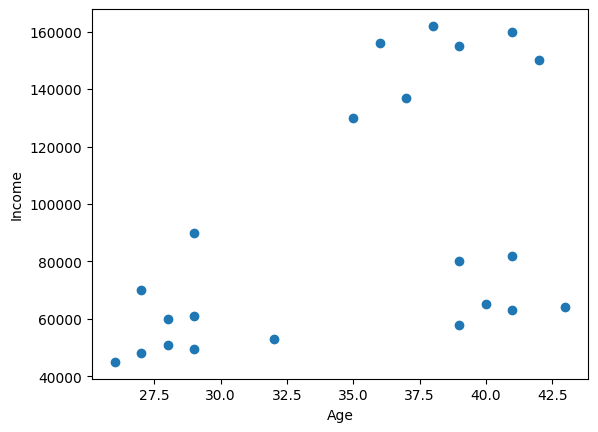

In [3]:
plt.scatter(df.Age, df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

#### **4. Apply K-Means Clustering**

Apply K-Means clustering with three clusters (`k=3`) and add the cluster assignments to the dataset.

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


#### **5. Analyze Cluster Centers**

The cluster centers represent the average values of `Age` and `Income` for each cluster. These centers can help interpret the clustering results.

In [5]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

#### **6. Visualize Clusters**

Visualize the clusters along with their centroids to understand the grouping.

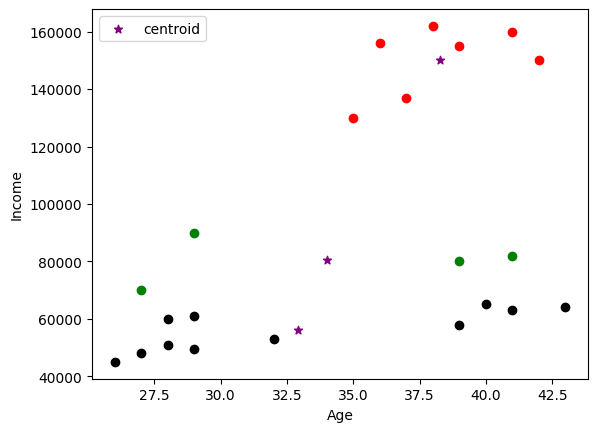

In [6]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

#### **7. Normalize the Data**
The KMeans clustering algorithm is sensitive to the scale of the data. If one feature (e.g., Income) has a much larger range or variance than another feature (e.g., Age), then the clustering will be dominated by the feature with the larger range. This is because the algorithm is based on calculating distances between data points.


We normalize the `Age` and `Income` features to scale them between 0 and 1, which can improve clustering performance when features have different ranges.

In [7]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


#### **8. Revisualize Normalized Data**

After normalization, visualize the data again to confirm the changes.

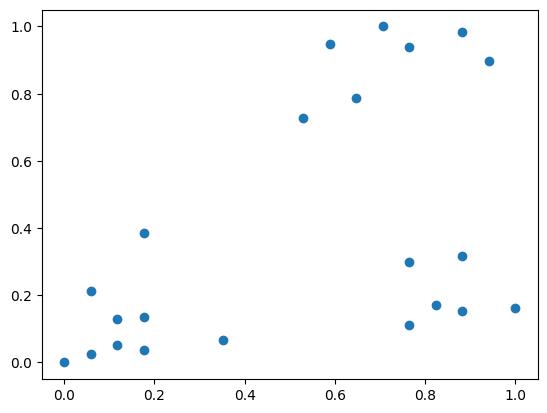

In [8]:
plt.scatter(df.Age, df['Income'])

#### **9. Reapply K-Means Clustering**

Reapply K-Means clustering on the normalized data to get updated cluster assignments.

In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


#### **10. Revisualize Clusters with Normalized Data**

Visualize the clusters again after normalization to see the updated centroids.

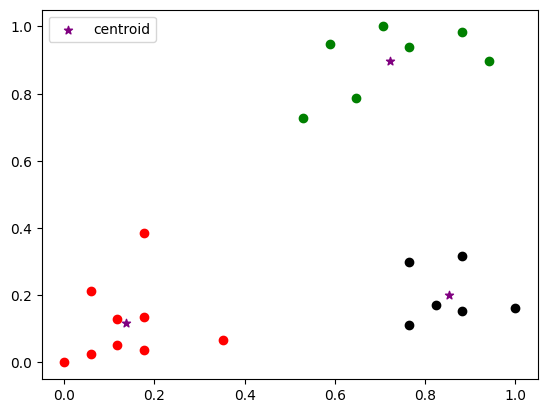

In [10]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.legend()

#### **11. Elbow Method**

The Elbow Method helps determine the optimal number of clusters by plotting the sum of squared errors (SSE) for different values of `k`. The point where the SSE begins to diminish significantly is the optimal `k`. 

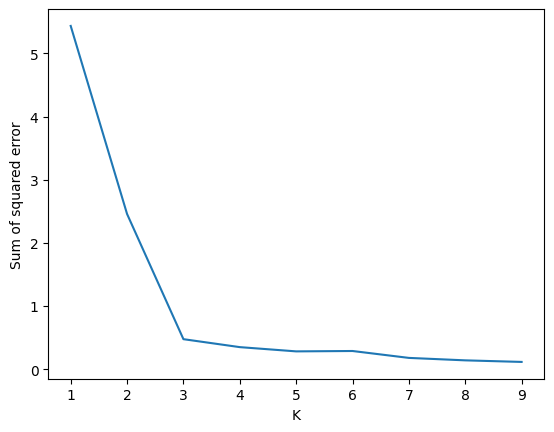

In [11]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)